# section (1a)
Analysing data types of features and updating the data type where required

In [440]:
import csv
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [441]:
#load the data file

telco_data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn_G9_new_17.csv")
print(telco_data.shape)

(7046, 24)


In [442]:
#viewing the top 5 records of the dataset

telco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,NaN,NaN,NaN
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,NaN,NaN
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN,NaN
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,NaN,NaN


In [443]:
# checking the datatypes of the dataset
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Unnamed: 21         float64
Unnamed: 22         float64
Unnamed: 23         float64
dtype: object

In [444]:
#or

telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   int64  
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7012 non-null   object 


# observation

(a). Upon inspection the entries in The TotalCharges Column look like float, but the dtype say is it an 'Object'.

(b). other than CustomerID, tenure, Monthlycharges, TotalCharges, the dtype of all other columns can be converted to Category

(c). the dtype of TotalCharges Should be converted to numeric.

(d). From the info... Columns Unnamed: 21 n 22 are empty columns

(e). Unnamed: 23 contains only 1 non-null value

In [445]:
##total charges should be converted to numeric

telco_data.TotalCharges= pd.to_numeric(telco_data["TotalCharges"], errors="coerce") 
# the parameter 'error' was in used to make all invalid values to become NaN

telco_data["TotalCharges"].dtype

dtype('float64')

In [446]:
#converting all objects data type to category

x = ["MonthlyCharges","TotalCharges","customerID", "tenure"] #since three column has been identified as numereic
for i in telco_data.columns:
    if i not in x:
        telco_data[i]=telco_data[i].astype("category")

In [447]:
#verify

telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7046 non-null   object  
 1   gender            7046 non-null   category
 2   SeniorCitizen     7046 non-null   category
 3   Partner           7046 non-null   category
 4   Dependents        7046 non-null   category
 5   tenure            7028 non-null   float64 
 6   PhoneService      7046 non-null   category
 7   MultipleLines     7046 non-null   category
 8   InternetService   7046 non-null   category
 9   OnlineSecurity    7018 non-null   category
 10  OnlineBackup      7046 non-null   category
 11  DeviceProtection  7046 non-null   category
 12  TechSupport       7046 non-null   category
 13  StreamingTV       7046 non-null   category
 14  StreamingMovies   7046 non-null   category
 15  Contract          7046 non-null   category
 16  PaperlessBilling  7012 n

# OBSERVATION

I observed there was a change in the memory usage after converting to categorcal

# conclusion
all observed object column in the dataset was converted to categorical, applying the appropriated method

# Section 1b

Checking for NaN values in the dataset, removing NaN where necessary.


In [448]:
# CHECKING FOR NAN VALUE IN DESCENDING ORDER
telco_data.isna().sum().sort_values()

           #or
#telco_data.isna()

customerID             0
Churn                  0
PaymentMethod          0
Contract               0
StreamingMovies        0
StreamingTV            0
TechSupport            0
OnlineBackup           0
DeviceProtection       0
MultipleLines          0
PhoneService           0
Dependents             0
Partner                0
SeniorCitizen          0
gender                 0
InternetService        0
MonthlyCharges         5
TotalCharges          11
tenure                18
OnlineSecurity        28
PaperlessBilling      34
Unnamed: 23         7045
Unnamed: 22         7046
Unnamed: 21         7046
dtype: int64

In [449]:
# I also observed there are also 11 nan value in total charges

#checking the record

telco_data.loc[telco_data["TotalCharges"].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22,Unnamed: 23
488,4472-LVYGI,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,NaN,NaN,NaN
753,3115-CZMZD,Male,0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.25,NaN,No,NaN,NaN,NaN
936,5709-LVOEQ,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,Two year,No,Mailed check,80.85,NaN,No,NaN,NaN,NaN
1082,4367-NUYAO,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.75,NaN,No,NaN,NaN,NaN
1340,1371-DWPAZ,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,No,Two year,No,Credit card (automatic),56.05,NaN,No,NaN,NaN,NaN
3331,7644-OMVMY,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,19.85,NaN,No,NaN,NaN,NaN
3826,3213-VVOLG,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.35,NaN,No,NaN,NaN,NaN
4380,2520-SGTTA,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.00,NaN,No,NaN,NaN,NaN
5218,2923-ARZLG,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,One year,Yes,Mailed check,19.70,NaN,No,NaN,NaN,NaN
6670,4075-WKNIU,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,No,Two year,No,Mailed check,73.35,NaN,No,NaN,NaN,NaN


In [450]:
#It was observed there are three unnnamed column(empty column)
telco_data.drop(columns=["Unnamed: 21", "Unnamed: 22", "Unnamed: 23"], inplace= True)

In [451]:
#dropping all the nan value in the 11 rows that was observed
telco_data.dropna(inplace=True)

In [452]:
#verify
telco_data.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7036,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [453]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6953 non-null   object  
 1   gender            6953 non-null   category
 2   SeniorCitizen     6953 non-null   category
 3   Partner           6953 non-null   category
 4   Dependents        6953 non-null   category
 5   tenure            6953 non-null   float64 
 6   PhoneService      6953 non-null   category
 7   MultipleLines     6953 non-null   category
 8   InternetService   6953 non-null   category
 9   OnlineSecurity    6953 non-null   category
 10  OnlineBackup      6953 non-null   category
 11  DeviceProtection  6953 non-null   category
 12  TechSupport       6953 non-null   category
 13  StreamingTV       6953 non-null   category
 14  StreamingMovies   6953 non-null   category
 15  Contract          6953 non-null   category
 16  PaperlessBilling  6953 n

# conclusion

After removing the nan values, There was a change in the column and row in the dataset
There was also a change in the memory usage 


# section 2a

Check for duplicates, view duplicated rows, and remove them, if any

In [454]:
#checking for duplicates
print(telco_data.duplicated().sum(), "Duplicate seen")

2 Duplicate seen


In [455]:
#observation: two duplicated rows was obsered

In [456]:
#viewning the dupliacted rows
telco_data[telco_data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7044,9489-DEDVP,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
7045,9867-JCZSP,Female,0,Yes,Yes,17.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


In [457]:
#dropping the duplicate

telco_data.drop_duplicates(inplace=True)

In [458]:
#verifying if the duplicates has been drop
print(telco_data.duplicated().sum(), "Duplicate seen")

0 Duplicate seen


In [459]:
telco_data[telco_data.duplicated()]

print(telco_data.shape)

(6951, 21)


# conclusion: 
the two observed duplicated rows was removed which affect the dataset row-wise

In [461]:
telco_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7032,6894-LFHLY,Male,1,No,No,1.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7033,9767-FFLEM,Male,0,No,No,38.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67.0,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19.0,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,7750-EYXWZ,Female,0,No,No,12.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


 # OBSERVATION

*The Index suppose to show 0 to 6950 and 6951 entries but still retains 0 to 7036 , which was the original 
*In this case the dataframe has to be reindexed

In [462]:
#reseting the index
telco_data.reset_index(inplace=True)

In [463]:
#verifying
telco_data.tail()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6946,7032,6894-LFHLY,Male,1,No,No,1.0,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
6947,7033,9767-FFLEM,Male,0,No,No,38.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
6948,7034,0639-TSIQW,Female,0,No,No,67.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
6949,7035,8456-QDAVC,Male,0,No,No,19.0,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
6950,7036,7750-EYXWZ,Female,0,No,No,12.0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


In [464]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             6951 non-null   int64   
 1   customerID        6951 non-null   object  
 2   gender            6951 non-null   category
 3   SeniorCitizen     6951 non-null   category
 4   Partner           6951 non-null   category
 5   Dependents        6951 non-null   category
 6   tenure            6951 non-null   float64 
 7   PhoneService      6951 non-null   category
 8   MultipleLines     6951 non-null   category
 9   InternetService   6951 non-null   category
 10  OnlineSecurity    6951 non-null   category
 11  OnlineBackup      6951 non-null   category
 12  DeviceProtection  6951 non-null   category
 13  TechSupport       6951 non-null   category
 14  StreamingTV       6951 non-null   category
 15  StreamingMovies   6951 non-null   category
 16  Contract          6951 n

# observation

it was observed that the number of column was also increase by 1 in the process of reseting the index, the column name is INDEX

In [465]:
#deleting the column INDEX
#telco_data.drop(['index'], axis=1)  
#telco_data
telco_data.drop(['index'], axis=1,inplace=True)   

# section (2b)

Check for outliers using boxplot and statistical method, and remove them, if any.

<Axes: >

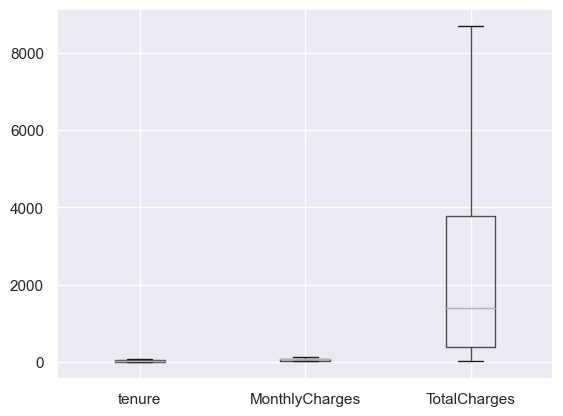

In [466]:
#generally check on all the numeric variables if there is any outliers using boxplot
telco_data.boxplot()

<Axes: xlabel='TotalCharges'>

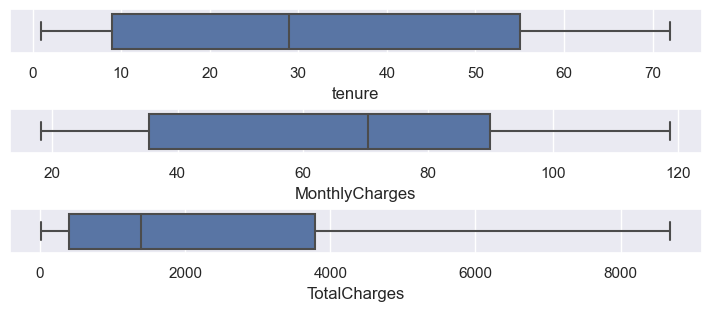

In [467]:
#still want to check on each of the numeric variable if there is any outliers
fig,(ax1,ax2,ax3)= plt.subplots(3,1, layout="constrained", figsize=(7,3))
sns.boxplot(x= telco_data["tenure"], ax=ax1)
sns.boxplot(x= telco_data["MonthlyCharges"], ax=ax2)
sns.boxplot(x= telco_data["TotalCharges"], ax=ax3)

In [468]:
# checking for outliers using statistical method

def deter_outlier(series):
    
    q1 = np.quantile(series, 0.25)
    q3 = np.quantile(series, 0.75)
    mini= series.min()
    maxi= series.max()
    IQR = q3-q1
    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR
    
    print(f"IQR = {IQR}")
    print(f"Q1  = {q1}")
    print(f"Q3  = {q3}")

    if mini<lower_limit:
        print("Outliers on the left")
    elif maxi>upper_limit:
        print("Outliers on the right")
    elif mini<lower_limit and maxi>upper_limit:
        print("Outliers on Both sides")
    else:
        print(f"No outliers")
    print()    

telco_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,6951.000000,6951.000000,6951.000000
mean,32.388146,64.809833,2281.512718
std,24.531961,30.145208,2268.858946
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,401.400000
50%,29.000000,70.400000,1391.650000
75%,55.000000,89.900000,3783.200000
max,72.000000,118.750000,8684.800000


In [469]:
deter_outlier(telco_data.tenure)

IQR = 46.0
Q1  = 9.0
Q3  = 55.0
No outliers



In [470]:
deter_outlier(telco_data.MonthlyCharges)

IQR = 54.45
Q1  = 35.45
Q3  = 89.9
No outliers



In [471]:
deter_outlier(telco_data.TotalCharges)

IQR = 3381.7999999999997
Q1  = 401.4
Q3  = 3783.2
No outliers



# Observation
In the both the statistical and boxplot methods used, no outliers where discovered

# conclusion
After using the appropriate method in checking for outliers, it was concluded that no outliers was found

# Section (2c)
For categorical features, draw countplot. Write your observations.

In [472]:
# dropping the customer id because its not needed for any analysis and also my new dataframe will be df
df= telco_data.drop("customerID", axis =1)  
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,Male,1,No,No,1.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
6947,Male,0,No,No,38.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
6948,Female,0,No,No,67.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
6949,Male,0,No,No,19.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No


In [473]:
#for easy, create a list of all categorical columns
# select the category dtype 
# select only the column names using the ".keys()" method
# convert it to a list using the list constructor, list()
ca_list = list((df.select_dtypes("category").keys()))

In [474]:
ca_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

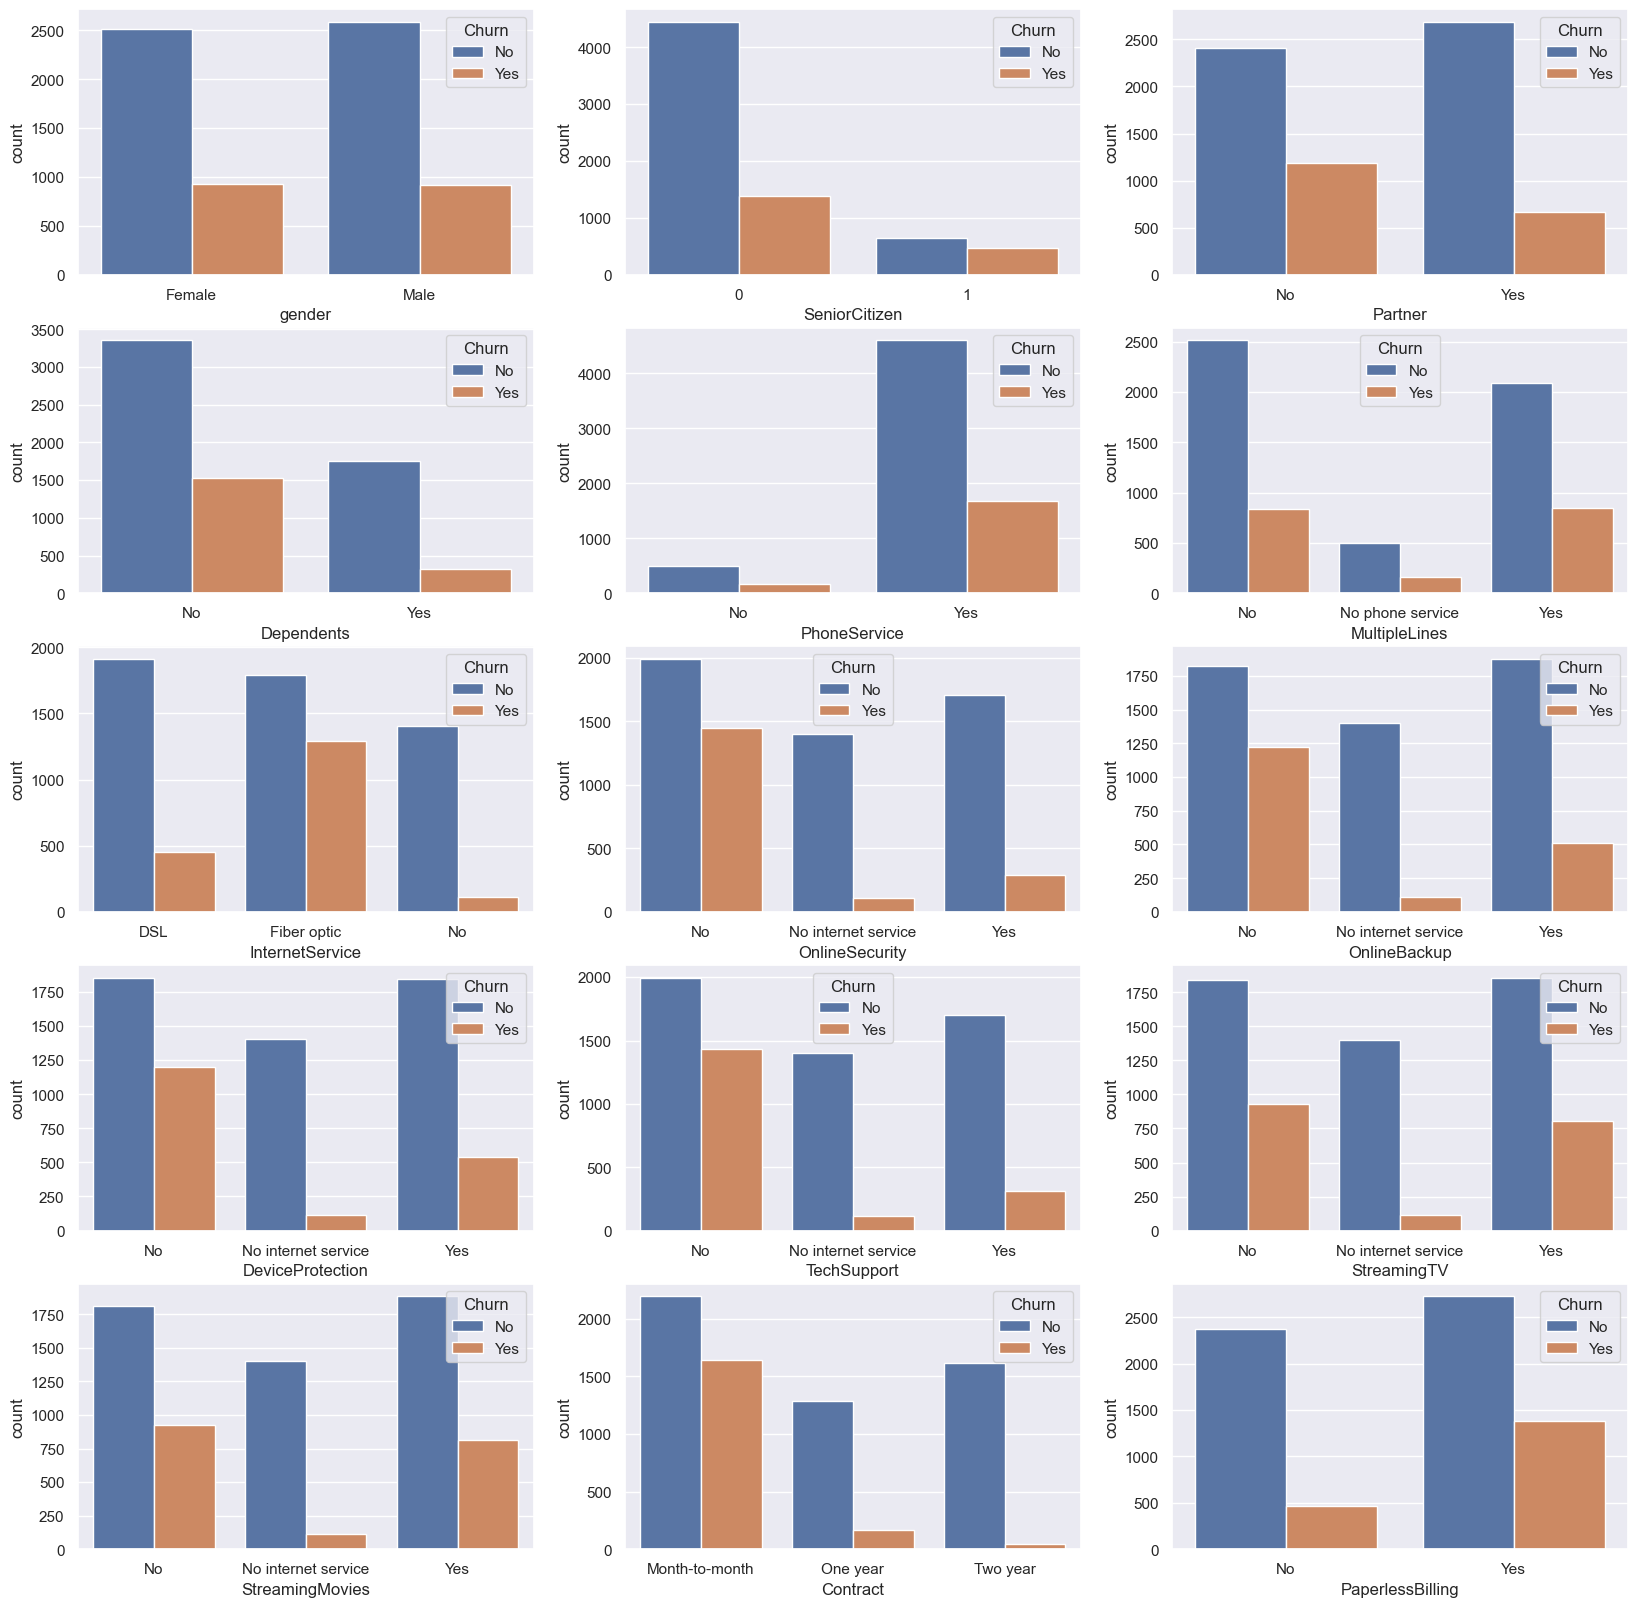

In [475]:
# using a loop to pick all the categorical features

index= 0  # this would serve as the index locator for col. names in our list
fig, ax = plt.subplots(5, 3, figsize=(20,20))
for row in range(5):
    for col in range(3):
        sns.countplot(x= ca_list[index], ax= ax[row, col], hue= 'Churn', data= df)
        # since "Churn" is our target variable lets view our columns with respect to it
        index= index+1

# Observation
   From the gender feature the ratio of the churned and not churned are almost similar
   
   I can also say that partners and dependent are negatively correlated
   
   The ratio of churners in senior citizens is very high i.e is more likely to churn

# Section (2d)

For numeric features, draw a histogram. 
Compute and about skewness of variables and apply transformation function, if needed.

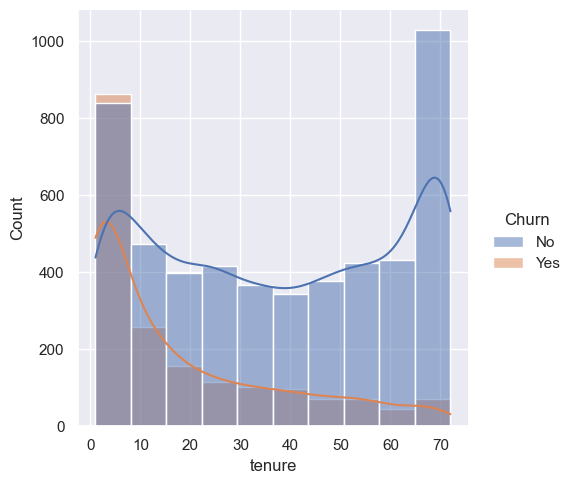

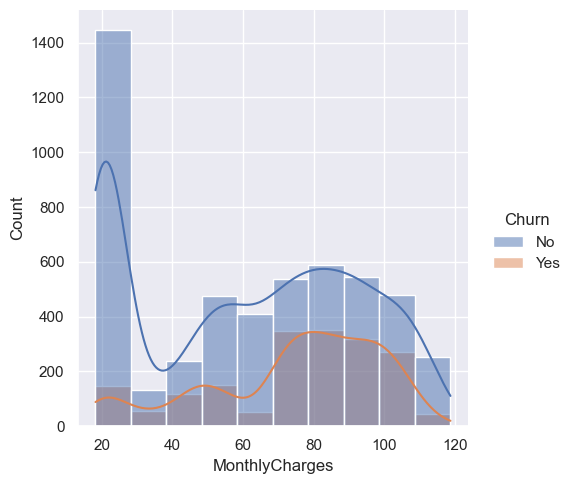

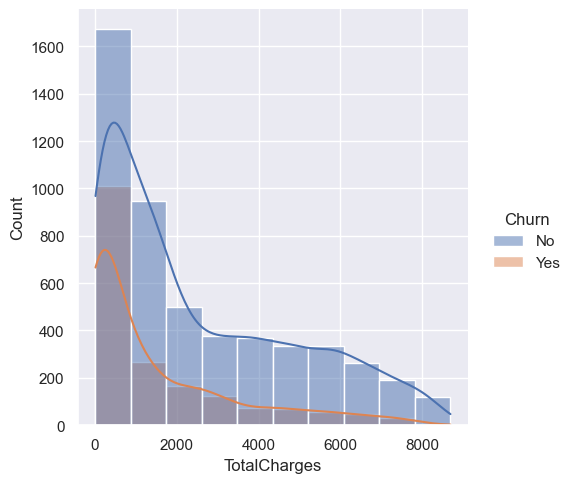

In [476]:
#for every numeric value draw a hist plot

for i in df.columns:
    if "float64" in str(df[i].dtype) or "int64" in str(df[i].dtype):
       plot = sns.displot(x=df[i], kde=True, hue="Churn", data=df, bins=10)

# observation

the longer customers stay with this company the lesser the chance of leaving

the lesser the monthly charges the higher the chance that the customer is retained 

In [477]:
def Skewness(df):
        for i in df.columns:
            if "float64" in str(df[i].dtype) or "intt64" in str(df[i].dtype):
                skew= (df[i]).skew()
                if skew > 0 and skew > 0.09:
                    print(f"Skew value for {df[i].name} = {skew}")
                    print(f"{df[i].name} is Skewed to the right")
                    print()
                elif skew < 0 and skew < -0.199:
                    print(f"Skew value for {df[i].name} = {skew}")
                    print(f"{df[i].name} is Skewed to the left")
                    print()
                else:
                    print(f"Skew value for {df[i].name} = {skew}")
                    print("Skewness level is ok")

In [478]:
Skewness(df)

Skew value for tenure = 0.2410829169624514
tenure is Skewed to the right

Skew value for MonthlyCharges = -0.2227428068898209
MonthlyCharges is Skewed to the left

Skew value for TotalCharges = 0.9659747307904564
TotalCharges is Skewed to the right



In [479]:
for i in df.columns:
            if "float64" in str(df[i].dtype) or "intt64" in str(df[i].dtype):
                skew= np.log(df[i]).skew()
                print(df[i].name,"--->", skew)

tenure ---> -0.9595545608797147
MonthlyCharges ---> -0.7287891329447845
TotalCharges ---> -0.7496764083485422


In [480]:
#tranformation using log skews the data to the left. this is what we want
for i in df.columns:
            if "float64" in str(df[i].dtype) or "int64" in str(df[i].dtype):
                skew= np.cbrt(df[i]).skew()
                print(df[i].name,"--->", skew)

tenure ---> -0.4446772765602386
MonthlyCharges ---> -0.5697852742485383
TotalCharges ---> 0.01759455559321431


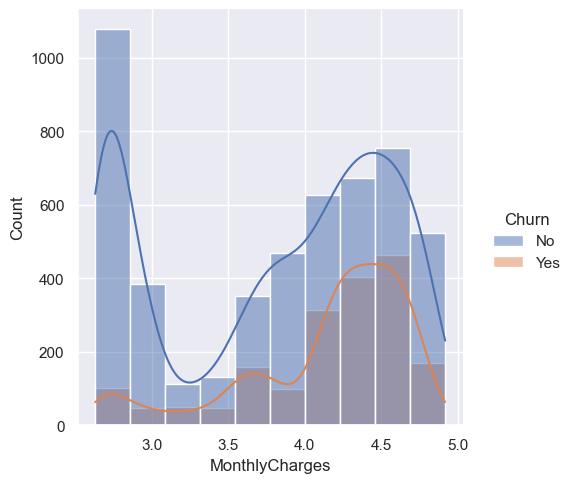

In [481]:
#transformation using the np.cbrt function skews the monthly and Tenure data further the left both normalises the totalcharges data.

plot = sns.displot(x=np.cbrt(df["MonthlyCharges"]), kde=True, hue="Churn", data=df, bins=10)

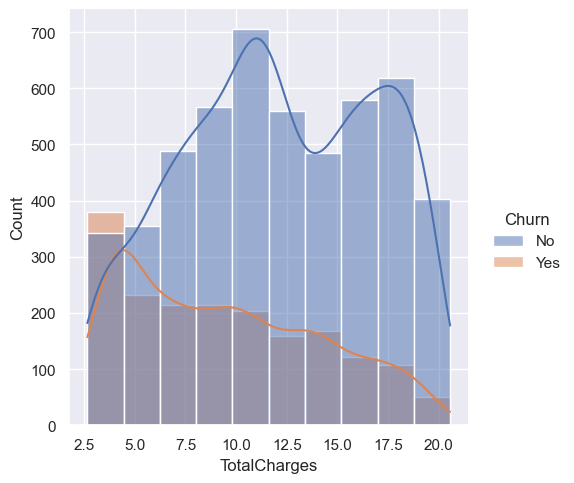

In [482]:
draw= sns.displot(x=np.cbrt(df["TotalCharges"]),kde=True, hue="Churn", data=df, bins=10)

# conclusion

*looking at the skewness of the original data, the column with the highest skewness is the total charges

*since the tranformation function may affect our data negatively, except for The totalcharges, i would prefer my data to remain the same.

# Section(3a)

Using correlation among independent features and demonstrate them using heatmap.

In [483]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246361,0.825438
MonthlyCharges,0.246361,1.000000,0.651317
TotalCharges,0.825438,0.651317,1.000000


In [484]:
Correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

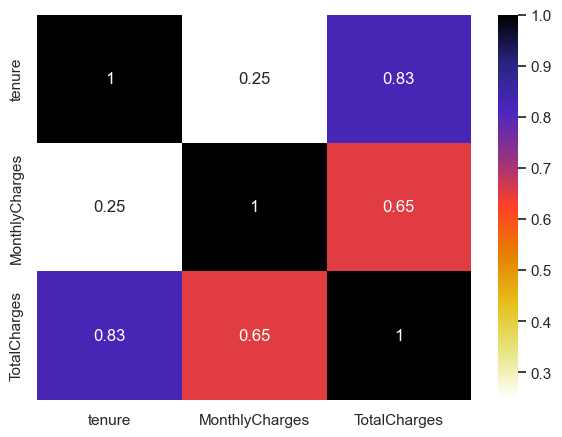

In [485]:
#For heat map, parse your Correlation into it.

plt.figure(figsize=(7,5))
sns.heatmap(Correlation, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

# observation:
totalcharges has the maximum correlation 

# section 3b

Come up with scatter plot with hue parameter. Write your observations from the plot.

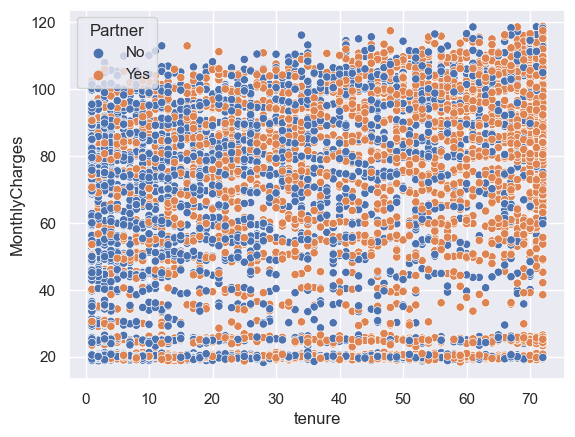

In [486]:
#Tenure vs MonthlyCharges 

sns.scatterplot( x='tenure', y='MonthlyCharges',data=df, hue='Partner');



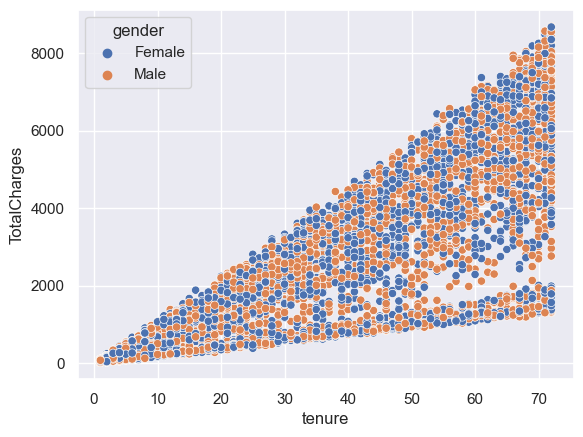

In [487]:
#tenure vs totalcharges

sns.scatterplot( x='tenure', y='TotalCharges',data=df, hue='gender');

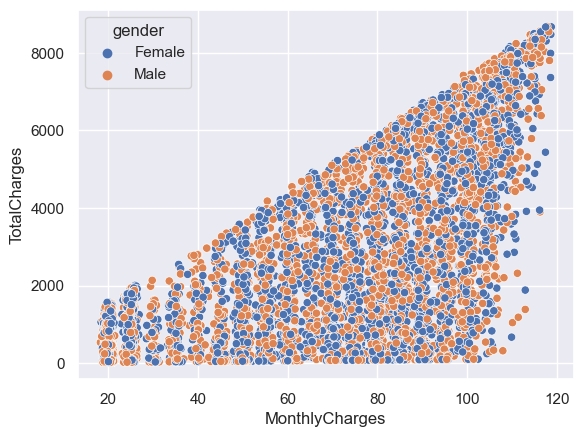

In [488]:
sns.scatterplot( x='MonthlyCharges', y='TotalCharges',data=df, hue='gender');

# observation
the relations between tenure and monthlycharges and totalcharges and monthlycharges in the distributions shows that male are active customers than male

# section 3c
Apply any scaling method to at least two independent features.

In [489]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [490]:
print(df['tenure'].max(), df['tenure'].min())

72.0 1.0


In [491]:
print(df['MonthlyCharges'].max(), df['MonthlyCharges'].min())

118.75 18.25


In [492]:
print(df['TotalCharges'].max(), df['TotalCharges'].min())

8684.8 18.8


In [493]:
#scaling using normalization method
scaler=MinMaxScaler()
y=df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y_scaled = scaler.fit_transform(y)
print(y_scaled[0:10,:])


[[0.         0.11542289 0.0012751 ]
 [0.46478873 0.38507463 0.21586661]
 [0.01408451 0.35422886 0.01031041]
 [0.61971831 0.23930348 0.21024117]
 [0.01408451 0.52189055 0.01533003]
 [0.09859155 0.80995025 0.09251096]
 [0.29577465 0.70497512 0.22277868]
 [0.12676056 0.11442786 0.0326679 ]
 [0.38028169 0.86119403 0.34932495]
 [0.85915493 0.37711443 0.40031733]]


In [494]:
#To view your transformed columns:y_Scaled i have to create a new dataframe

pd.DataFrame(y_scaled, columns=['tenure','MonthlyCharges','TotalCharges'])

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
6946,0.000000,0.572139,0.006572
6947,0.521127,0.509950,0.300767
6948,0.929577,0.842786,0.792459
6949,0.253521,0.601493,0.170355


# section 4
Convert categorical features into numeric ones using appropriate encoding techniques

In [495]:


label_encode = LabelEncoder()   #this will help me create an instance of label encoder

In [496]:
print(label_encode)

LabelEncoder()


In [498]:
#converting all categorical features to numeric using label encoder by entering each categorical feature one after the other

df.gender = label_encode.fit_transform(df.gender)
df.Partner = label_encode.fit_transform(df.Partner)
df.Dependents = label_encode.fit_transform(df.Dependents)
df.PhoneService = label_encode.fit_transform(df.PhoneService)
df.MultipleLines = label_encode.fit_transform(df.MultipleLines)
df.InternetService = label_encode.fit_transform(df.InternetService)
df.OnlineSecurity = label_encode.fit_transform(df.OnlineSecurity)
df.OnlineBackup = label_encode.fit_transform(df.OnlineBackup)
df.DeviceProtection = label_encode.fit_transform(df.DeviceProtection)
df.TechSupport = label_encode.fit_transform(df.TechSupport)
df.StreamingTV = label_encode.fit_transform(df.StreamingTV)
df.StreamingMovies = label_encode.fit_transform(df.StreamingMovies)
df.Contract = label_encode.fit_transform(df.Contract)
df.PaperlessBilling = label_encode.fit_transform(df.PaperlessBilling)
df.PaymentMethod = label_encode.fit_transform(df.PaymentMethod)
df.Churn = label_encode.fit_transform(df.Churn)

In [499]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# observation:
 it was observed that most categorical features have more than two unique value and in converting from categorical to numeric applying labelencoder was the appropriate method

# section (3d)
Compute correlation of each independent feature with dependent variable
‘Churn’. Select seven most important independent features from the set.

In [500]:
 # y is dependent variable and X is independent variable.
y = df['Churn']
 # Load X Variables into a Pandas Dataframe with columns 
X = df.drop(['Churn'], axis = 1)
print(y.shape)
print(X.shape)

(6951,)
(6951, 19)


In [501]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [502]:
# then split the data into train and test data
# since we are dealing with classification problem, will be using Using stratify parameter to get proportionate samples of both classes in train and test
X_train, X_test, y_train, y_test = train_test_split (X, y,random_state=30, test_size=0.2,stratify=y)   

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())
print(y_train.value_counts())     #checking for the value count
print(y_test.value_counts())

(5560, 19)
(1391, 19)
(5560,)
(1391,)
0    5101
1    1850
Name: Churn, dtype: int64
0    4080
1    1480
Name: Churn, dtype: int64
0    1021
1     370
Name: Churn, dtype: int64


In [503]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3869,1,0,0,0,19.0,0,1,0,0,0,0,0,0,0,0,1,0,25.15,468.35
6873,0,0,0,0,38.0,1,0,1,0,0,0,0,2,2,1,1,3,89.10,3342.00
4093,1,0,1,1,72.0,1,2,1,0,2,2,2,2,2,2,0,1,110.90,7922.75
477,1,0,0,0,12.0,1,2,1,0,0,2,0,2,0,0,1,2,89.55,1021.75
4856,1,0,1,1,27.0,1,0,1,2,2,0,0,0,0,1,1,1,80.65,2209.75


In [504]:
#correlating independent feature with dependent variable using pearson correlation
num_features=7
cor_x_y = X_train.corrwith(y_train)
cor_x_y 

gender             -0.009972
Partner            -0.145573
Dependents         -0.157230
tenure             -0.353374
PhoneService        0.014490
MultipleLines       0.039864
InternetService    -0.048383
OnlineSecurity     -0.285127
OnlineBackup       -0.198373
DeviceProtection   -0.178806
TechSupport        -0.283958
StreamingTV        -0.039790
StreamingMovies    -0.043833
Contract           -0.400079
PaperlessBilling    0.186486
PaymentMethod       0.112720
MonthlyCharges      0.188966
TotalCharges       -0.198525
dtype: float64

In [505]:
cor_x_y.sort_values(ascending=False)    #in decreasing order

MonthlyCharges      0.188966
PaperlessBilling    0.186486
PaymentMethod       0.112720
MultipleLines       0.039864
PhoneService        0.014490
gender             -0.009972
StreamingTV        -0.039790
StreamingMovies    -0.043833
InternetService    -0.048383
Partner            -0.145573
Dependents         -0.157230
DeviceProtection   -0.178806
OnlineBackup       -0.198373
TotalCharges       -0.198525
TechSupport        -0.283958
OnlineSecurity     -0.285127
tenure             -0.353374
Contract           -0.400079
dtype: float64

In [506]:
selected_features = cor_x_y.sort_values(ascending=False).head(num_features).index.tolist()
type(selected_features)
selected_features                #selecting seven independent features

['MonthlyCharges',
 'PaperlessBilling',
 'PaymentMethod',
 'MultipleLines',
 'PhoneService',
 'gender',
 'StreamingTV']

In [507]:
df_selected_train=pd.DataFrame(X_train[selected_features])
print(df_selected_train)

      MonthlyCharges  PaperlessBilling  PaymentMethod  MultipleLines  \
3869           25.15                 1              0              1   
6873           89.10                 1              3              0   
4093          110.90                 0              1              2   
477            89.55                 1              2              2   
4856           80.65                 1              1              0   
...              ...               ...            ...            ...   
1538           19.55                 1              1              0   
3313           75.50                 1              2              2   
5301           98.00                 1              2              2   
3026           84.80                 0              2              0   
2105           20.25                 0              1              0   

      PhoneService  gender  StreamingTV  
3869             0       1            0  
6873             1       0            2  
4093     

# section 5
Consider ‘Churn’ column is prediction variable. Apply feature selection
method to the dataset using SelectKBest() to reduce the dataset size to 7 features

In [508]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [509]:
select_cols = SelectKBest(mutual_info_classif, k=7)
select_cols.fit(X_train, y_train)
X_train.columns[select_cols.get_support()]

Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'Contract', 'PaymentMethod'],
      dtype='object')

# conclusion:
in applying SelectkBest, the size of the dataset  was reduced to 7 and our dataset is clean

# IDAHOTA-AMBROSE-SAMSON-Group_17-Capstone_project_1.ipynb_


<h3 style='color:red'> # Comments </h3>
<h4 style='color:red'> 1) Section 1 (10 marks)  </h4>
<h5 style='color:blue'>
You have addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Analyse data types of features and verify they hold data same as that of their datatype. Update if required: <br>
    ----- Data types are checked with info() and dtypes. <br>
    ----- The 'CustomerID' column may be removed and not converted to category type. <br>
    ----- The 'SeniorCitizen' may be also converted to category type. <br> 

<br>
- b. Check for Nan values in data and remove them using appropriate method, if any: <br>
      ----- Null values checked and displayed such columns. <br>
      ----- You may handle nulls using mean() and/or mode() imputation method for different columns. <br>
  ---- Observations are well written down.<br>
</h5>
<h5 style='color:green'>
<u> Marks scored:  9 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 2) Section 2 (20 marks)  </h4>
<h5 style='color:blue'>       Learner has addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Check for duplicates, view duplicated rows, and remove them, if any: <br>
      ----- Duplicates checked, displayed and dropped. <br>
      ----- You used drop_duplicates() for removing duplicates. <br>
      ---- Observations are well written down.<br>
<br>
- b. Check for outliers using boxplot and statistical method, and remove them, if any.: <br>
--------- Boxplots have been used for the visualisation for numeric variables, Great!!!. <br>
--------- Statistical methods are used for getting upper and lower limits, if there are outliers.  <br>
------ Observations are well written down.<br>
<br>
- c. For categorical features, draw countplot. Write your observations: <br>
     ----- countplot drawn for many discrete variables having very few unique values. <br>
     ----- Both x and hue parameters are assigned to gain more insights. <br>
     ----- Observations are well written down. <br>
  <br>
- d. For numeric features, draw a histogram. Compute and about skewness of variables and apply transformation function, if needed: <br>
     ----- Histograms drawn with displot() for multiple variables; (Symmetry may be commented) <br>
     ----- Observations are well written down.
<h5 style='color:green'>
<u> Marks scored: 20 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 3) Section 3 (20 marks)   </h4>
<h5 style='color:blue'>   Learner has addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Using correlation among independent features and demonstrate them using heatmap: <br>
      ----- Computed corr() and demonstrated using heatmap. <br>
      ----- Specfic columns names used for computation. <br>
      ----- Observations are well written down. <br>

<br>
- b. Come up with scatter plot with hue parameter. Write your observations from the plot: <br>
      ----- Scatterplot drawn. Proper parameters for x and y and hue are set. Variables x and y are usually assigned numeric variables.  <br>
      ----- Observations may be written down. <br>
      ----- Instead of taking other categorical variables for HUE parameter, 'Churn' may be chosen, as it is a classification variable. <br>
<br>
- c. Apply any scaling method to at least two independent features: <br>
     ----- Scaling method StandardScaler and MinMaxScaler are applied for all three numeric variables. <br>
     ----- Scaled features have been used for further processing. Finally, it can be used for model building.

<br>
- d. Compute correlation of each independent feature with dependent variable ‘Churn’. Select seven most important independent features from the set: <br>
     ----- Correlation of each independent feature computed with dependent variable ‘Churn’ using corrwith(). <br>
     ----- After sorting, the seven most important independent features are listed. 
<h5 style='color:green'>
<u> Marks scored: 19 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 4) Section 4: (5 marks) </h4>
<h5 style='color:blue'>    Following are the observations/ suggestions that may be taken care of- <br>
Convert categorical features into numeric ones using appropriate encoding techniques: <br> <br>
     ----- Encoding has been done (only unique values mapped to integers) for many categorical features by converting variables to integer type mostly using LabelEncoder. <br> 
     ----- Ordinal nature of categorical features need to be considered for encoding. If feature is ordinal or has just two unique values, then only use Label_Encoder(). <br> 
     ----- The ‘PaymentMethod’ column being non-ordinal with four unique values, should be encoded using get_dummies().<br>  
     ----- The ‘MultipleLines’ column three unique values, use get_dummies() or oneHotEncoder 
<h5 style='color:green'>                                   
<u> Marks scored: 4 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 5) Section 5: (5 marks) </h4>
<h5 style='color:blue'>    Following are the observations/ suggestions that may be taken care of- <br>
Consider ‘Churn’ column is prediction variable. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 7 features:  <br>
     ----- First, Dependent and Independent variables are separated out. ‘Churn’ column is the prediction variable. <br>
     ----- You used SelectKBest() for feature selection.  <br>
     ----- For feature selection scaled data must be used. <br> 
     ----- As our problem is a classification problem, you used f_classif() with SelectKbest. Using 'mutual_info_regression' will not be okay, rather 'mutual_info_classif' should be used. As SelectKBest is used with support(), then it has returned the selected feature names(). Only this features can be used for model building then.
<h5 style='color:green'>
<u> Marks scored: 4 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
     ----- NOTE: Actually, normalize/scaling may be done/not done for every numeric feature of dataset, when working on DATA SCIENCE PROJECT, depending on ML algorithm to be used further. <br>
    <br>
     ----- NOTE: Actually, encoding may be done for each and every categorical feature, when working on DATA SCIENCE PROJECT. <br>
    <br>
</h5>

<h5 style='color:red'>
<u> Total Marks scored: 56  </u><br>
    <br>
<b> CONGRATULATIONS!!! You have added observations at many places. <br>
    KEEP IT UP!!!!
You have successfully completed your capstone project. <br>
    You will receive your certificate from the LMS team. </b><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

Refer to __[https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)__  for more details of Feature Selection.
